In [189]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import statsmodels.api as sm

In [242]:
data = pd.read_csv('travel_data.tsv', sep='\t', parse_dates=[1])

In [243]:
data.head()

,ga:pagePath,ga:date,ga:sessions
0,www.travelocity.com/flights-search,2017-01-04,364537
1,www.travelocity.com/flights-search,2017-01-05,332169
2,www.travelocity.com/flights-search,2016-12-06,272280
3,www.travelocity.com/,2017-01-03,268885
4,www.travelocity.com/flights-search,2017-01-02,267440


In [244]:
gData = data.groupby(['ga:pagePath', 'ga:date']).sum()

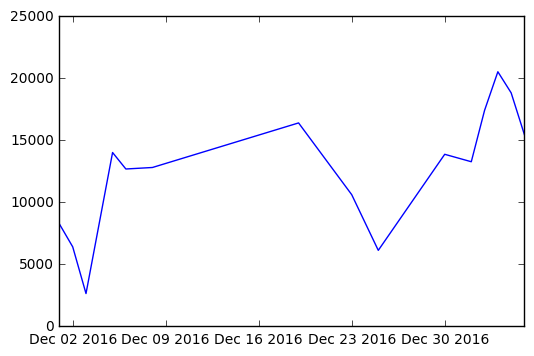

In [245]:
plt.plot(gData.ix['(other)'])

In [246]:
gData.ix['www.travelocity.com/']

,ga:sessions
ga:date,
2016-12-01,191696
2016-12-02,170833
2016-12-03,139675
2016-12-04,177041
2016-12-05,213344
2016-12-06,211459
2016-12-08,178916
2016-12-11,154482
2016-12-12,186320


In [252]:
data2 = gData

In [253]:
data2

ga:sessions
ga:pagePath                                        ga:date                
(other)                                            2016-12-01         8259
                                                   2016-12-02         6419
                                                   2016-12-03         2652
                                                   2016-12-05        14026
                                                   2016-12-06        12698
                                                   2016-12-08        12819
                                                   2016-12-19        16413
                                                   2016-12-23        10627
                                                   2016-12-25         6137
                                                   2016-12-30        13883
                                                   2017-01-01        13283
                                                   2017-01-02        17426
                                                   2017-01-03        20539
                                                   2017-01-04        18839
                                                   2017-01-05        15463
www.travelocity.com/                               2016-12-01       191696
                                                   2016-12-02       170833
                                                   2016-12-03       139675
                                                   2016-12-04       177041
                                                   2016-12-05       213344
                                                   2016-12-06       211459
                                                   2016-12-08       178916
                                                   2016-12-11       154482
                                                   2016-12-12       186320
                                                   2016-12-13       188642
                                                   2016-12-14       175344
                                                   2016-12-16       149314
                                                   2016-12-17       133416
                                                   2016-12-18       151347
                                                   2016-12-19       177518
...                                                                    ...
www.travelocity.com/trips                          2016-12-26         3539
                                                   2016-12-27         3634
                                                   2017-01-01         2718
                                                   2017-01-02         3204
                                                   2017-01-05         3384
www.travelocity.com/tzaneen-hotels-coach-house-... 2016-12-19          115
www.travelocity.com/vacation-packages              2016-12-01         9469
                                                   2016-12-02         8286
                                                   2016-12-03         8355
                                                   2016-12-06        10591
                                                   2016-12-08         9909
                                                   2016-12-12         9282
                                                   2016-12-15         7899
                                                   2016-12-23         6994
                                                   2016-12-25         7363
                                                   2016-12-31        11296
                                                   2017-01-01        14432
                                                   2017-01-02        16351
                                                   2017-01-03        16185
                                                   2017-01-04        16082
                                                   2017-01-05        14449
www.traveloci

In [254]:
data2.head()

ga:sessions
ga:pagePath ga:date                
(other)     2016-12-01         8259
            2016-12-02         6419
            2016-12-03         2652
            2016-12-05        14026
            2016-12-06        12698

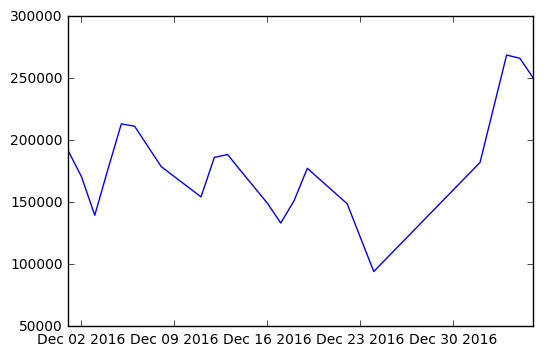

In [255]:
plt.plot(data2.ix['www.travelocity.com/'])

In [256]:
data2.ix['www.travelocity.com/']

,ga:sessions
ga:date,
2016-12-01,191696
2016-12-02,170833
2016-12-03,139675
2016-12-04,177041
2016-12-05,213344
2016-12-06,211459
2016-12-08,178916
2016-12-11,154482
2016-12-12,186320


In [257]:
data2 = pd.read_csv('travel_data.tsv', sep='\t', parse_dates=[1])

In [258]:
data2 = data2.groupby(['ga:pagePath', 'ga:date']).sum()

In [259]:
sess = data2.ix['www.travelocity.com/']['ga:sessions']
sess = sess.reset_index()
del sess['ga:date']
sess.head()

,ga:sessions
0,191696
1,170833
2,139675
3,177041
4,213344


In [260]:
type(sess['ga:sessions'][0])

numpy.int64

21

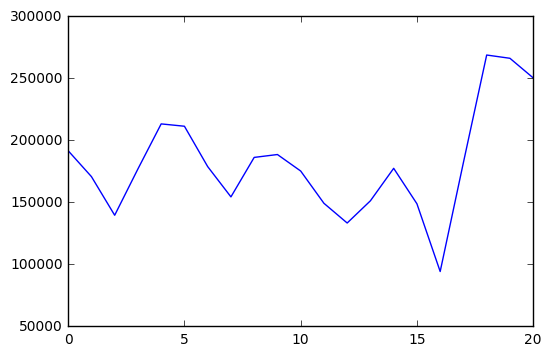

In [261]:
plt.plot(sess)

In [284]:
def test_arima(orders, x):
    order = orders[:3]
    seasonal_order = orders[3:]
    seasonal_order = np.insert(seasonal_order, 3, 7)
    try:
        fit = sm.tsa.statespace.SARIMAX(x, maxlag=2, trend='n', method='css', order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False).fit()
        if math.isnan(fit.bic):
            return float('inf')
        return fit.bic
    except Exception as err:
        print err
        return float('inf')
        

In [285]:
from scipy.optimize import brute
grid = (slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1))
res = brute(test_arima, grid, args=(sess,), finish=None, full_output=True)

Number of states in statespace model must be a positive number.
Number of states in statespace model must be a positive number.
maxlag should be < nobs
maxlag should be < nobs
could not broadcast input array from shape (0,0) into shape (7,7)
maxlag should be < nobs
maxlag should be < nobs
could not broadcast input array from shape (0,0) into shape (14,14)
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be

/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag s

/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs


/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag s

/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
global name 'math' is not defined
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag s

/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [286]:
res

(array([ 0.,  0.,  0.,  0.,  0.,  0.]), inf, array([[[[[[[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]]],
 
 
           [[[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]]],
 
 
           [[[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]]]],
 
 
 
          [[[[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]]],
 
 
           [[[0, 0, 0],
             [0, 

In [239]:
fit = sm.tsa.statespace.SARIMAX(sess, trend='n', order=(1,0,0) , seasonal_order=(1,0,0,7)).fit()
print fit.bic

511.167348357


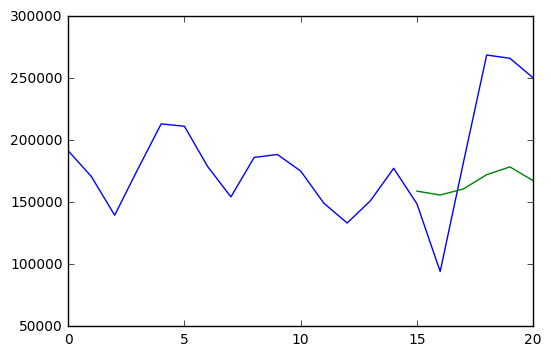

In [231]:
plt.plot(sess)
plt.plot(fit.predict(start=15, end=20, dynamic=True))